# This is a scratch space for building functions
After functions are made, move them to the corresponding folder. 

First we import the necessary objects:

In [1]:
from pathlib import Path
from flow_analysis_comps.PIV.PIV_process import AMF_PIV
from flow_analysis_comps.PIV.definitions import PIV_params
from flow_analysis_comps.PIV.PIV_visualize import visualizerParams
import matplotlib.pyplot as plt

%matplotlib widget
%load_ext autoreload
%autoreload 2

## Video import and general settings
Videos are assumed to have the following structure:

```
videoFolder
|--videoInfo.txt / metadata.json
|--Img
    |--Img_****.tif
```

Such that the metadata is not in the same folder as the TIF files. 

In [2]:
data_adr = Path(r"G:\AMOLF_Data\AMOLF-SHIMIZU Dropbox\Simon van Staalduine\001 (1)")
plate_id = r"20250122_Plate017"
video_id = r"vortex_stable"
frame_id1 = r"Img_0000.tif"
frame_id2 = r"Img_0001.tif"
tif_folder_name = "Img"

winsize = 64  # pixels, interrogation window size in frame A
nr_of_passes = 3
# frame_ids = (0, 1)
STN_thresh = .5
video_path=str(data_adr / "Img")


piv_param_obj = PIV_params(
    video_path=video_path,
    segment_mode="brightfield",
    window_size_start=winsize,
    number_of_passes=nr_of_passes,
    stn_threshold=STN_thresh,
    max_speed_px_per_frame=5.0
)

# params = visualizerParams(use_mask=False, use_flags=True)
PIV_process = AMF_PIV(piv_param_obj)


(64, 32, 16) (32, 16, 8)


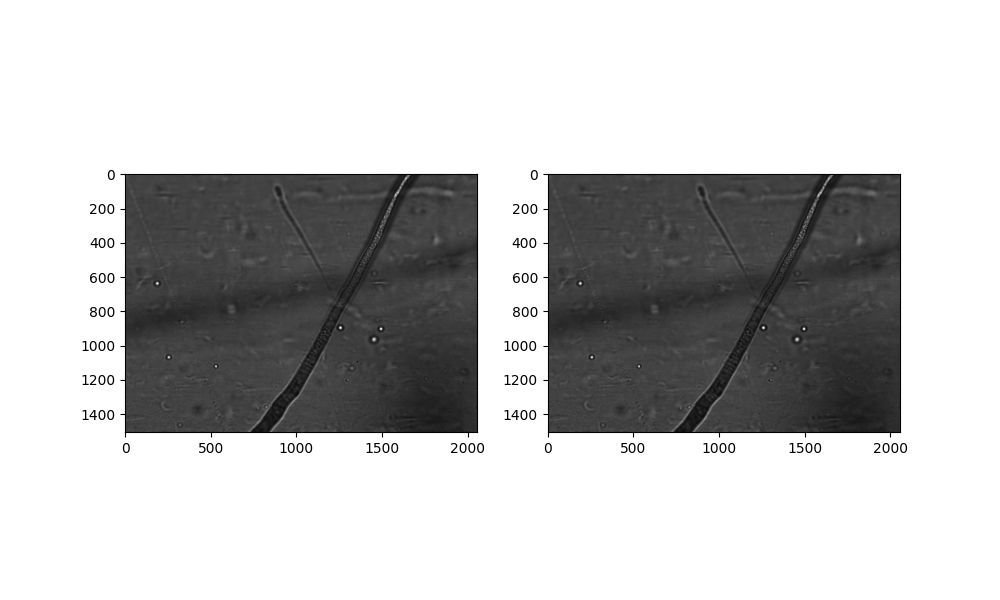

In [3]:
PIV_process.plot_raw_images((0, 1))

In [ ]:
PIV_process.run_single_frame()

In [ ]:
PIV_process.run_full_video()

(93, 127) (93, 127) (93, 127)
(187, 256) (187, 256) (187, 256)
Saving to G:\AMOLF_Data\AMOLF-SHIMIZU Dropbox\Simon van Staalduine\001 (1)\OpenPIV_results_16_PIV_output\field_A0000.txt
Image Pair 1
Img_00000 Img_00001
(93, 127) (93, 127) (93, 127)
(187, 256) (187, 256) (187, 256)
Saving to G:\AMOLF_Data\AMOLF-SHIMIZU Dropbox\Simon van Staalduine\001 (1)\OpenPIV_results_16_PIV_output\field_A0001.txt
Image Pair 2
Img_00001 Img_00002


In [ ]:
PIV_process.visualizer.get_mean_orient()

In [ ]:
PIV_process.visualizer.plot_grid_interp_frame_data(data_shown="speed_dir", pull_from_mean_data=True)

In [ ]:
for i in range(2000):
    PIV_process.visualizer.set_image_index(i)
    fig = PIV_process.visualizer.plot_full_figure(dpi=300)
    fig.savefig(rf"U:\test_data\20250122_Plate017\043\combine_movie\frame_{i:04}" )
    fig.clear()
    plt.close(fig)


In [ ]:
PIV_process.visualizer.show_current_frame()

In [ ]:
from flow_analysis_comps.util.video_io import tif_folder_to_mp4
video_folder = Path(r"U:\test_data\20250122_Plate017\043\combine_movie")

tif_folder_to_mp4(video_folder, video_folder.parent / "PIV_Movie.mp4", suffix=".png")

In [ ]:
data_adr = Path(r"G:\AMOLF_Data\AMOLF-SHIMIZU Dropbox\Simon van Staalduine")
plate_id = r"20250122_Plate017"
video_id = r"vortex_stable"
frame_id1 = r"Img_0000.tif"
frame_id2 = r"Img_0001.tif"
tif_folder_name = "Img"
# filter_mode = "aharm_thresh"

raw_img_adr = data_adr / video_id / "Img"

fps = 1
winsize = 10  # pixels, interrogation window size in frame A
searchsize = 12  # pixels, search area size in frame B
overlap = 4  # pixels
frame_ids = (0, 1)

STN_thresh = 0.08



In [ ]:
amf_piv_obj = AMF_PIV(piv_param_obj)
amf_piv_obj.plot_raw_images(frame_ids)
amf_piv_obj.plot_segmentation()


In [ ]:
# amf_piv_obj.piv_process(frame_ids, FAKE_OUTLIERS=False)
amf_piv_obj.run_full_video(frame_ids)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def read_and_filter_piv(um_per_px, fps, import_path):
    import_db = pd.read_table(import_path)
    import_db = import_db[import_db["mask"] == 0]
    import_db = import_db[import_db["flags"] == 0]
    import_db["abs"] = np.sqrt(import_db["u"] ** 2 + import_db["v"] ** 2)
    import_db["um/s"] = import_db["abs"] * um_per_px * fps
    import_db["dir"] = np.arctan2(import_db["v"], import_db["u"])
    import_db["speed_x"], import_db["speed_y"] = (
        import_db["u"] * um_per_px * fps,
        import_db["v"] * um_per_px * fps,
    )
    # import_db = import_db[abs(import_db["abs"]) - 0.8 > 0]
    return import_db


def polar2cart(theta, r):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y


um_per_px = 0.138
fps = 20
time_point = "0027"

In [ ]:
def save_piv_quiver(time_point):
    import_path = Path(
        rf"U:\test_data\20250122_Plate017\043\OpenPIV_results_8_PIV_output\field_A{time_point}.txt"
    )
    import_db = read_and_filter_piv(um_per_px, fps, import_path)
    fig, ax = plt.subplots(figsize=(5, 7), dpi=200)
    ax.quiver(
        import_db["# x"], import_db["y"], import_db["u"], import_db["v"], scale=300
    )
    ax.set_aspect("equal")
    fig.savefig(rf"U:\test_data\20250122_Plate017\043\quiver_movie\{time_point}")
    fig.clear()


for i in range(2000):
    time_str = f"{i:04}"
    save_piv_quiver(time_str)

In [ ]:
fig, ax = plt.subplot_mosaic(
    [["speed_hist", "density"], ["angle_hist", "density"]], figsize=(8, 4)
)
ax["speed_hist"].hist(import_db["um/s"], bins=50, range=(1, 10))
ax["angle_hist"].hist(import_db["dir"], bins=50, range=(-np.pi, np.pi))
ax["density"].scatter(import_db["speed_x"], import_db["speed_y"], alpha=0.03)
ax["density"].grid(True)
ax["density"].axhline(0, c="black")
ax["density"].axvline(0, c="black")
import_db